In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 2: Load Dataset
df = pd.read_csv("/heart.csv")  # Ensure the dataset is in the correct directory

# Step 3: Remove Duplicate Rows
df = df.drop_duplicates()

# Step 4: Handle Missing Values (Fill with Median)
df.fillna(df.median(), inplace=True)

# Step 5: Normalize Numerical Features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 6: Save Cleaned Data
df.to_csv("cleaned_data.csv", index=False)

# Step 7: Display Dataset Info
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       305 non-null    float64
 1   sex       305 non-null    int64  
 2   cp        305 non-null    int64  
 3   trestbps  305 non-null    float64
 4   chol      305 non-null    float64
 5   fbs       305 non-null    int64  
 6   restecg   305 non-null    float64
 7   thalach   305 non-null    float64
 8   exang     305 non-null    int64  
 9   oldpeak   305 non-null    float64
 10  slope     305 non-null    int64  
 11  ca        305 non-null    int64  
 12  thal      305 non-null    int64  
 13  target    305 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 35.7 KB


(None,
         age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
 0  0.479167    1   0  0.292453  0.196347    0      1.0  0.740458      0   
 1  0.500000    1   0  0.433962  0.175799    1      0.0  0.641221      1   
 2  0.854167    1   0  0.481132  0.109589    0      1.0  0.412214      1   
 3  0.666667    1   0  0.509434  0.175799    0      1.0  0.687023      0   
 4  0.687500    0   0  0.415094  0.383562    1      1.0  0.267176      0   
 
     oldpeak  slope  ca  thal  target  
 0  0.161290      2   2     3       0  
 1  0.500000      0   0     3       0  
 2  0.419355      0   0     3       0  
 3  0.000000      2   1     3       0  
 4  0.306452      1   3     2       0  )

              age         sex          cp    trestbps        chol         fbs  \
count  305.000000  305.000000  305.000000  305.000000  305.000000  305.000000   
mean     0.530328    0.685246    0.963934    0.354872    0.274631    0.150820   
std      0.187765    0.465181    1.036510    0.164979    0.117801    0.358461   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.395833    0.000000    0.000000    0.245283    0.194064    0.000000   
50%      0.562500    1.000000    1.000000    0.339623    0.260274    0.000000   
75%      0.666667    1.000000    2.000000    0.433962    0.337900    0.000000   
max      1.000000    1.000000    3.000000    1.000000    1.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  305.000000  305.000000  305.000000  305.000000  305.000000  305.000000   
mean     0.527869    0.599474    0.327869    0.168800    1.393443    0.721311   
std      0.525699    0.1740

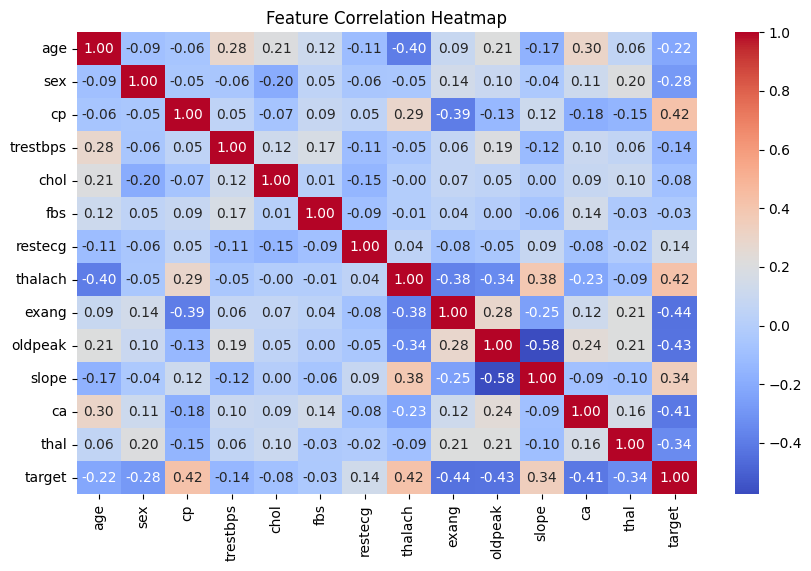

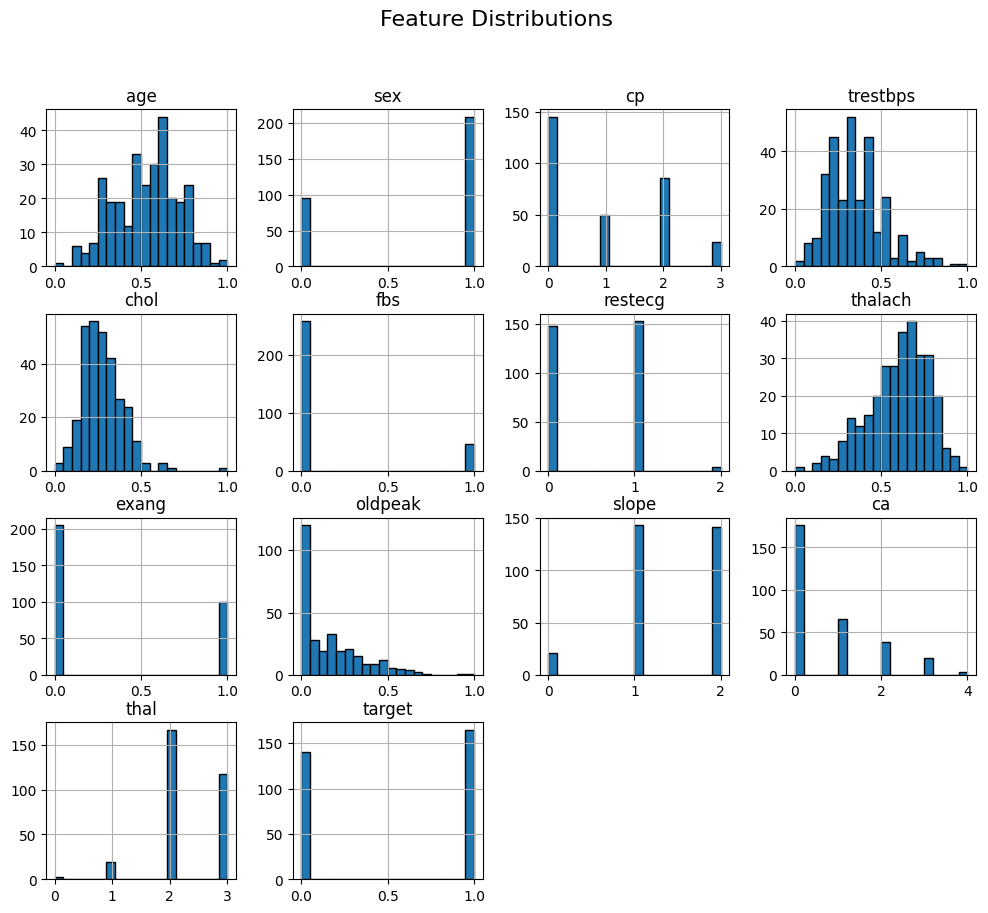

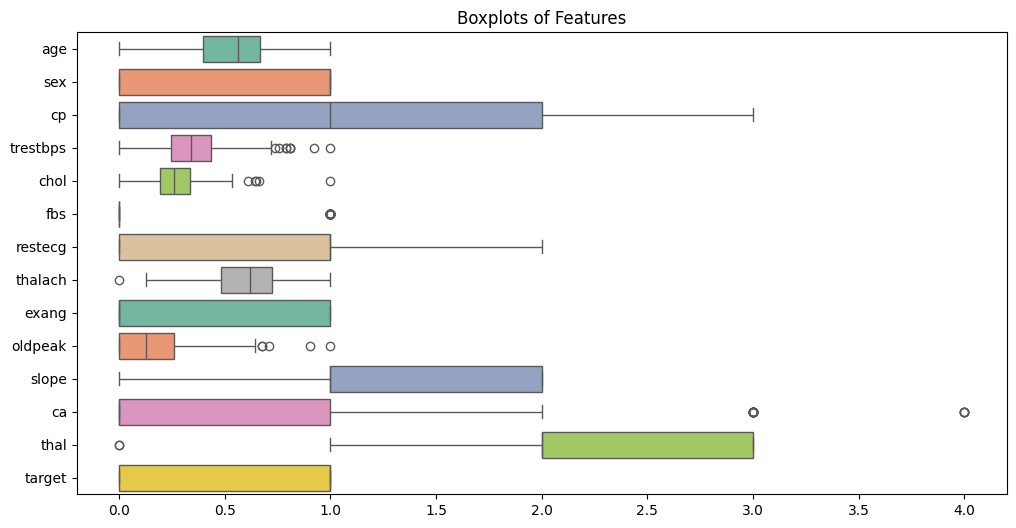

In [2]:
# Step 1: Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Statistical Summary
print(df.describe())

# Step 3: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 4: Histograms
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Step 5: Boxplots to Identify Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Features")
plt.show()

In [33]:
# Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].describe().transpose())

          count      mean       std  min       25%       50%       75%  max
age       305.0  0.530328  0.187765  0.0  0.395833  0.562500  0.666667  1.0
trestbps  305.0  0.354872  0.164979  0.0  0.245283  0.339623  0.433962  1.0
chol      305.0  0.274631  0.117801  0.0  0.194064  0.260274  0.337900  1.0
thalach   305.0  0.599474  0.174001  0.0  0.480916  0.618321  0.725191  1.0
oldpeak   305.0  0.168800  0.186986  0.0  0.000000  0.129032  0.258065  1.0


In [40]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [41]:
# Feature Selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
X = df.drop(columns=['target'])
y = df['target']
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
selected_features_rf = feature_importances.nlargest(10).index
print("Feature Selected using Random Forest:", selected_features_rf)

Feature Selected using Random Forest: Index(['thalach', 'oldpeak', 'age', 'thal_3', 'thal_2', 'chol', 'trestbps',
       'exang_1', 'slope_2', 'ca_1'],
      dtype='object')


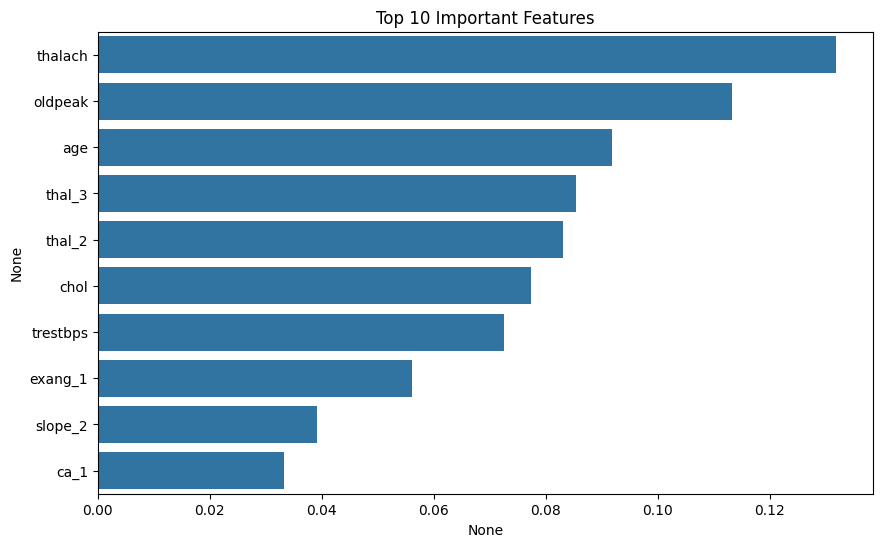

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.nlargest(10),
            y=feature_importances.nlargest(10).index)
plt.title('Top 10 Important Features')
plt.show()

<ipython-input-43-4142b224ba2a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['target'], palette="viridis")


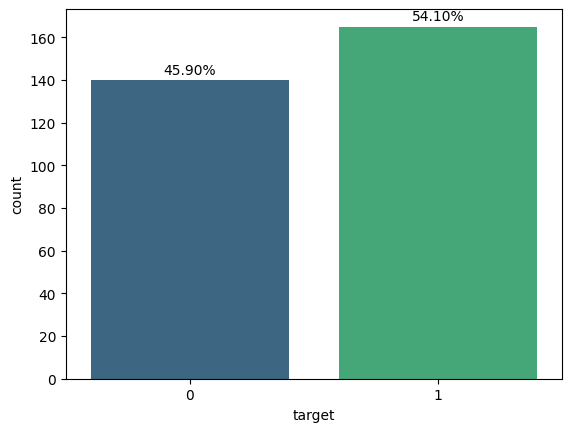

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Summary (Distribution of target values)
# Plot the distribution of heart disease cases (0 = No disease, 1 = Disease)
total = float(len(df['target']))
ax = sns.countplot(x=df['target'], palette="viridis")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}%'.format(height / total * 100), ha="center")
plt.show()

In [76]:
from experta import KnowledgeEngine, Rule, Fact, P , NOT # Import Rule, Fact, and P

# Define the Risk Assessment Knowledge Engine
class HeartRiskAssessment(KnowledgeEngine):

    @Rule(Fact(blood_pressure=P(lambda x: x > 140)), Fact(Thalassemia_Test_Result=P(lambda x: x >= 2)))
    def high_risk_cholesterol(self):
        self.declare(Fact(risk='high'))
        print("High risk due to high cholesterol and Thalassemia Test Result > or = 2.")

    @Rule(Fact(cholesterol=P(lambda x: x > 240)), Fact(age=P(lambda x: x > 50)))
    def high_risk_cholesterol(self):
        self.declare(Fact(risk='high'))
        print("High risk due to high cholesterol and age > 50.")

    @Rule(Fact(blood_pressure=P(lambda x: x > 140)), Fact(smoking='yes'))
    def high_risk_bp_smoking(self):
        self.declare(Fact(risk='high'))
        print("High risk due to high blood pressure and smoking.")

    @Rule(Fact(exercise='regular'), Fact(bmi=P(lambda x: x < 25)))
    def low_risk_exercise(self):
        self.declare(Fact(risk='low'))
        print("Low risk due to regular exercise and BMI < 25.")

    @Rule(Fact(age=P(lambda x: x > 60)), Fact(exercise='none'))
    def high_risk_age_exercise(self):
        self.declare(Fact(risk='high'))
        print("High risk due to age > 60 and lack of exercise.")

    @Rule(Fact(diabetes='yes'), Fact(blood_pressure=P(lambda x: x > 130)))
    def high_risk_diabetes_bp(self):
        self.declare(Fact(risk='high'))
        print("High risk due to diabetes and high blood pressure.")

    @Rule(Fact(cholesterol=P(lambda x: x < 200)), Fact(exercise='regular'))
    def low_risk_cholesterol_exercise(self):
        self.declare(Fact(risk='low'))
        print("Low risk due to healthy cholesterol levels and exercise.")

    @Rule(Fact(sex=1), Fact(age=P(lambda x: x > 55)), Fact(blood_pressure=P(lambda x: x > 135)))
    def high_risk_men_age_bp(self):
        self.declare(Fact(risk='high'))
        print("High risk for men over 55 with high blood pressure.")

    @Rule(Fact(thalach=P(lambda x: x < 100)))
    def high_risk_low_heart_rate(self):
        self.declare(Fact(risk='high'))
        print("High risk due to low maximum heart rate.")

    @Rule(Fact(oldpeak=P(lambda x: x > 2.5)))
    def high_risk_st_depression(self):
        self.declare(Fact(risk='high'))
        print("High risk due to ST depression.")

    @Rule(Fact(risk='high'))
    def final_high_risk(self):
        print("Final assessment: HIGH RISK of heart disease.")

    @Rule(Fact(risk='low'))
    def final_low_risk(self):
        print("Final assessment: LOW RISK of heart disease.")

    @Rule(NOT(Fact(risk='high')), NOT(Fact(risk='low')))
    def no_risk(self):
        self.declare(Fact(no_risk='true'))
        print("No problem detected.")

    @Rule(Fact(no_risk='true'))
    def final_no_risk(self):
        print("Final assessment: No risk of heart disease.")


# Function to take user input and run the inference engine
def assess_risk():
    engine = HeartRiskAssessment()
    engine.reset()

    age = int(input("Enter age: "))
    cholesterol = int(input("Enter cholesterol level: "))
    blood_pressure = int(input("Enter blood pressure: "))
    smoking = input("Do you smoke? (yes/no): ")
    exercise = input("Do you exercise regularly? (yes/no): ")
    bmi = float(input("Enter BMI: "))
    diabetes = input("Do you have diabetes? (yes/no): ")
    sex = int(input("Enter sex (1 for male, 0 for female): "))
    thalach = int(input("Enter max heart rate: "))
    oldpeak = float(input("Enter ST depression value: "))

    engine.declare(Fact(age=age))
    engine.declare(Fact(cholesterol=cholesterol))
    engine.declare(Fact(blood_pressure=blood_pressure))
    engine.declare(Fact(smoking=smoking))
    engine.declare(Fact(exercise=exercise))
    engine.declare(Fact(bmi=bmi))
    engine.declare(Fact(diabetes=diabetes))
    engine.declare(Fact(sex=sex))
    engine.declare(Fact(thalach=thalach))
    engine.declare(Fact(oldpeak=oldpeak))

    engine.run()

# Uncomment to run the assessment
assess_risk()

Enter age: 78
Enter cholesterol level: 88
Enter blood pressure: 9
Do you smoke? (yes/no): no
Do you exercise regularly? (yes/no): yes
Enter BMI: 55
Do you have diabetes? (yes/no): no
Enter sex (1 for male, 0 for female): 1
Enter max heart rate: 77
Enter ST depression value: 7
High risk due to ST depression.
Final assessment: HIGH RISK of heart disease.
High risk due to low maximum heart rate.


In [64]:
from experta import KnowledgeEngine, Rule, Fact, P, NOT

# Define the Risk Assessment Knowledge Engine
class HeartRiskAssessment(KnowledgeEngine):

    @Rule(Fact(blood_pressure=P(lambda x: x > 140)), Fact(cholesterol=P(lambda x: x > 240)), Fact(age=P(lambda x: x > 50)))
    def very_high_risk(self):
        self.declare(Fact(risk='very_high'))
        print("Very High Risk: Hypertension, high cholesterol, and age over 50.")

    @Rule(Fact(blood_pressure=P(lambda x: x > 140)), Fact(smoking='yes'), Fact(diabetes='yes'))
    def very_high_risk_diabetes_smoking(self):
        self.declare(Fact(risk='very_high'))
        print("Very High Risk: High BP, smoking, and diabetes.")

    @Rule(Fact(cholesterol=P(lambda x: x > 240)), Fact(blood_pressure=P(lambda x: x > 140)))
    def high_risk_cholesterol_bp(self):
        self.declare(Fact(risk='high'))
        print("High Risk: High cholesterol and high blood pressure.")

    @Rule(Fact(age=P(lambda x: x > 60)), Fact(exercise='none'), Fact(bmi=P(lambda x: x > 30)))
    def high_risk_sedentary_obese(self):
        self.declare(Fact(risk='high'))
        print("High Risk: Age > 60, no exercise, and obesity.")

    @Rule(Fact(cholesterol=P(lambda x: x > 200)), Fact(exercise='none'))
    def moderate_risk_cholesterol_exercise(self):
        self.declare(Fact(risk='moderate'))
        print("Moderate Risk: High cholesterol and no exercise.")

    @Rule(Fact(blood_pressure=P(lambda x: x > 130)), Fact(bmi=P(lambda x: x > 28)))
    def moderate_risk_bp_bmi(self):
        self.declare(Fact(risk='moderate'))
        print("Moderate Risk: Elevated BP and high BMI.")

    @Rule(Fact(exercise='regular'), Fact(cholesterol=P(lambda x: x < 200)), Fact(bmi=P(lambda x: x < 25)))
    def low_risk_exercise(self):
        self.declare(Fact(risk='low'))
        print("Low Risk: Regular exercise, healthy BMI, and cholesterol.")

    @Rule(Fact(risk='very_high'))
    def final_very_high_risk(self):
        print("Final Assessment: VERY HIGH risk of heart disease.")

    @Rule(Fact(risk='high'))
    def final_high_risk(self):
        print("Final Assessment: HIGH risk of heart disease.")

    @Rule(Fact(risk='moderate'))
    def final_moderate_risk(self):
        print("Final Assessment: MODERATE risk of heart disease.")

    @Rule(Fact(risk='low'))
    def final_low_risk(self):
        print("Final Assessment: LOW risk of heart disease.")

    @Rule(NOT(Fact(risk='very_high')), NOT(Fact(risk='high')), NOT(Fact(risk='moderate')), NOT(Fact(risk='low')))
    def no_risk(self):
        self.declare(Fact(no_risk='true'))
        print("No risk detected.")

    @Rule(Fact(no_risk='true'))
    def final_no_risk(self):
        print("Final Assessment: NO risk of heart disease.")


# Function to take user input and run the inference engine
def assess_risk():
    engine = HeartRiskAssessment()
    engine.reset()

    age = int(input("Enter age: "))
    cholesterol = int(input("Enter cholesterol level: "))
    blood_pressure = int(input("Enter blood pressure: "))
    smoking = input("Do you smoke? (yes/no): ")
    exercise = input("Do you exercise regularly? (yes/no): ")
    bmi = float(input("Enter BMI: "))
    diabetes = input("Do you have diabetes? (yes/no): ")

    engine.declare(Fact(age=age))
    engine.declare(Fact(cholesterol=cholesterol))
    engine.declare(Fact(blood_pressure=blood_pressure))
    engine.declare(Fact(smoking=smoking))
    engine.declare(Fact(exercise=exercise))
    engine.declare(Fact(bmi=bmi))
    engine.declare(Fact(diabetes=diabetes))

    engine.run()

# Uncomment to run the assessment
assess_risk()

Enter age: 40
Enter cholesterol level: 45
Enter blood pressure: 70
Do you smoke? (yes/no): no
Do you exercise regularly? (yes/no): yes
Enter BMI: 56
Do you have diabetes? (yes/no): no
No risk detected.
Final Assessment: NO risk of heart disease.


In [44]:
# Split the data (80/20)
X = df.drop(columns=['target']) # Features
y = df['target'] # Target (Diabetic or Not)

y_discrete = y

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

In [70]:
# Make Predictions
y_pred = best_model.predict(X_test)

In [71]:
# Evaluate the Model
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===== Model Evaluation =====")
print(f"Accuracy: {accuracy * 100 :.2f}")
print(f"Precision: {precision * 100 :.2f}")
print(f"Recall: {recall * 100 :.2f}")
print(f"F1-score: {f1 *100 :.2f}")



===== Model Evaluation =====
Accuracy: 78.69
Precision: 73.53
Recall: 86.21
F1-score: 79.37


In [72]:
# Function to evaluate Expert System
def evaluate_expert_system(test_data, true_labels):
    engine = HeartRiskAssessment()  # Initialize expert system
    correct_predictions = 0  # Counter for correct predictions


    unseen_data = [
       {"age": 62, "cholesterol": 250, "blood_pressure": 135, "smoking": "no", "exercise": "none", "bmi": 28, "diabetes": "yes", "sex": 1, "thalach": 120, "oldpeak": 1.5},
       {"age": 70, "cholesterol": 350, "blood_pressure": 150, "smoking": "yes", "exercise": "yes", "bmi": 22, "diabetes": "no", "sex": 0, "thalach": 140, "oldpeak": 2},
       {"age": 20, "cholesterol": 390, "blood_pressure": 120, "smoking": "no", "exercise": "none", "bmi": 22, "diabetes": "yes", "sex": 1, "thalach": 130, "oldpeak": 1.1},
       {"age": 65, "cholesterol": 150, "blood_pressure": 118, "smoking": "no", "exercise": "yes", "bmi": 26, "diabetes": "yes", "sex": 1, "thalach": 170, "oldpeak": 3},
       {"age": 30, "cholesterol": 230, "blood_pressure": 120, "smoking": "yes", "exercise": "none", "bmi": 32, "diabetes": "no", "sex": 0, "thalach": 160, "oldpeak": 1}]

    total_cases = len(unseen_data)

    for i, row in enumerate(unseen_data):
        engine.reset()  # Reset the engine for each case

        # Declare facts based on test data
        engine.declare(Fact(age=row['age']))
        engine.declare(Fact(cholesterol=row['cholesterol']))
        engine.declare(Fact(blood_pressure=row['blood_pressure']))
        engine.declare(Fact(smoking=row['smoking']))
        engine.declare(Fact(exercise=row['exercise']))
        engine.declare(Fact(bmi=row['bmi']))
        engine.declare(Fact(diabetes=row['diabetes']))
        engine.declare(Fact(sex=row['sex']))
        engine.declare(Fact(thalach=row['thalach']))
        engine.declare(Fact(oldpeak=row['oldpeak']))

        # Run inference
        engine.run()

        # Get final risk assessment from engine
        risk = None
        for fact in engine.facts.values():
            if isinstance(fact, Fact) and 'risk' in fact:
                risk = fact['risk']
                break

        # Convert 'high' and 'low' to binary values
        predicted = 1 if risk == 'high' else 0


        actual = 1 if row.get('target') == 'high' else 0

        if predicted == actual:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / total_cases
    return accuracy


In [73]:
# Evaluate Expert System
expert_system_accuracy = evaluate_expert_system(X_test, y_test)

# Evaluate Decision Tree Model
y_pred_tree = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Importing necessary metrics functions

tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

# Compare Results
print("\n===== Comparison of Expert System and Decision Tree =====")
print(f"Expert System Accuracy: {expert_system_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {tree_accuracy * 100:.2f}%")
print(f"Decision Tree Precision: {tree_precision * 100:.2f}%")
print(f"Decision Tree Recall: {tree_recall * 100:.2f}%")
print(f"Decision Tree F1-score: {tree_f1 * 100:.2f}%")


Moderate Risk: High cholesterol and no exercise.
Final Assessment: MODERATE risk of heart disease.
Very High Risk: Hypertension, high cholesterol, and age over 50.
Final Assessment: VERY HIGH risk of heart disease.
High Risk: High cholesterol and high blood pressure.
Final Assessment: HIGH risk of heart disease.
Moderate Risk: High cholesterol and no exercise.
Final Assessment: MODERATE risk of heart disease.
No risk detected.
Final Assessment: NO risk of heart disease.
Moderate Risk: High cholesterol and no exercise.
Final Assessment: MODERATE risk of heart disease.

===== Comparison of Expert System and Decision Tree =====
Expert System Accuracy: 100.00%
Decision Tree Accuracy: 78.69%
Decision Tree Precision: 73.53%
Decision Tree Recall: 86.21%
Decision Tree F1-score: 79.37%


<ipython-input-74-9525839e482a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


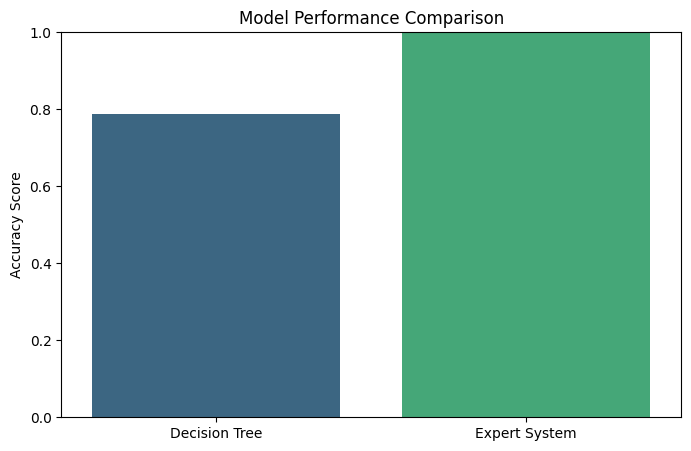

Decision Tree Accuracy: 0.79
Precision: 0.74, Recall: 0.86, F1-score: 0.79


In [74]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns
# Compare Performance
models = ['Decision Tree', 'Expert System']
accuracies = [tree_accuracy, expert_system_accuracy]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()

# Print Evaluation Metrics
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")